In [92]:
#beginning stages of project. exploratory work

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Intro 
* basic exploration 
*  

In [94]:
stats = pd.read_csv('stats.csv')

In [95]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-null  float64
 22

In [96]:
stats.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,...,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,...,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,...,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,...,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,...,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,...,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,...,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


In [97]:
stats['Player'].nunique()

2374

# Initial exploratory ideas/questions 
* what stats can be added into the dataframe
    * TS% -> `pts / 2(FGA + (.44 X FTA))`
    * tFGA (total field goal attempts) -> `stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)`
    * tFTA
    * t3PA
    * t2PA
    * tTSA
    

In [98]:
stats['TS%'] = stats['PTS'] / (2 * (stats['FGA'] + (.44 * stats['FTA'])))

In [99]:
stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)

In [100]:
stats['tFTA'] = round(stats['FTA'] * stats['G'], 0)

In [101]:
stats['t3PA'] = round(stats['3PA'] * stats['G'], 0)

In [102]:
stats['t2PA'] = round(stats['2PA'] * stats['G'], 0)

In [103]:
stats['tTSA'] = stats['tFGA'] + stats['tFTA']

In [104]:
stats[stats['tTSA'] > 500]\
    .sort_values(by=['TS%'],ascending=False).head(20)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA
14018,195,Rudy Gobert,C,29,UTA,66,66,32.1,5.5,7.7,...,1.8,2.7,15.6,2021-2022,0.732532,508.0,442.0,7.0,502.0,950.0
14396,478,Mitchell Robinson,C,23,NYK,72,62,25.7,3.6,4.8,...,0.8,2.7,8.5,2021-2022,0.720339,346.0,180.0,0.0,346.0,526.0
14366,457,Dwight Powell,C,30,DAL,82,71,21.9,3.3,4.9,...,0.8,2.7,8.7,2021-2022,0.719722,402.0,213.0,41.0,361.0,615.0
7655,86,Tyson Chandler,C,29,NYK,62,62,33.2,3.9,5.7,...,1.6,3.0,11.3,2011-2012,0.711229,353.0,316.0,0.0,353.0,669.0
14002,181,Daniel Gafford,C,23,WAS,72,53,20.1,4.0,5.7,...,0.9,2.4,9.4,2021-2022,0.709541,410.0,151.0,0.0,410.0,561.0
12653,177,Rudy Gobert,C,27,UTA,68,68,34.3,5.7,8.2,...,1.9,3.2,15.1,2019-2020,0.699333,558.0,401.0,0.0,558.0,959.0
13779,8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,...,1.7,1.7,16.1,2021-2022,0.697090,543.0,235.0,11.0,538.0,778.0
9378,89,Tyson Chandler,C,32,DAL,75,75,30.5,3.9,5.9,...,1.4,2.3,10.3,2014-2015,0.696322,442.0,255.0,0.0,442.0,697.0
7074,85,Tyson Chandler,C,28,DAL,74,74,27.8,3.6,5.5,...,1.2,3.2,10.1,2010-2011,0.695592,407.0,296.0,0.0,407.0,703.0
9603,266,Kyle Korver,SG,33,ATL,75,75,32.2,3.9,8.0,...,1.4,1.9,12.1,2014-2015,0.695083,600.0,120.0,450.0,150.0,720.0


In [105]:
stats.sort_values(by=['TS%'], ascending=False)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA
11320,207,Nigel Hayes,SF,23,TOR,2,0,3.0,1.0,1.0,...,0.5,0.0,3.0,2017-2018,1.5,2.0,0.0,2.0,0.0,2.0
12322,448,Jordan Sibert,SG,26,ATL,1,0,4.0,1.0,1.0,...,0.0,0.0,3.0,2018-2019,1.5,1.0,0.0,1.0,0.0,1.0
12062,261,John Jenkins,SG,27,WAS,4,0,3.5,0.5,0.5,...,0.0,0.0,1.5,2018-2019,1.5,2.0,0.0,2.0,0.0,2.0
11151,68,Anthony Brown,SF,25,MIN,1,0,4.0,1.0,1.0,...,0.0,0.0,3.0,2017-2018,1.5,1.0,0.0,1.0,0.0,1.0
11490,344,Naz Mitrou-Long,SG,24,UTA,1,0,1.0,1.0,1.0,...,0.0,0.0,3.0,2017-2018,1.5,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,378,C.J. Miles,SG,34,BOS,1,0,2.0,0.0,0.0,...,0.0,1.0,0.0,2021-2022,NaN,0.0,0.0,0.0,0.0,0.0
14290,391,Juwan Morgan,PF,24,BOS,1,0,4.0,0.0,0.0,...,0.0,0.0,0.0,2021-2022,NaN,0.0,0.0,0.0,0.0,0.0
14299,398,Ade Murkey,SG,24,SAC,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,2021-2022,NaN,0.0,0.0,0.0,0.0,0.0
14430,502,Chris Silva,PF,25,MIN,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,2021-2022,NaN,0.0,0.0,0.0,0.0,0.0


## Explore Shooting
* Min 500+ tTSA (true shooting attempts)
* Min 100+ FT (free throw attempts)
* Min 55+ 3p (3 point attempts)
* Explore by:
    * Position (Frontcourt/Backcourt)
    * 
 

In [106]:
true_shooting = stats[stats['tTSA'] > 500]\
                    .sort_values(by=['TS%'],ascending=False)


In [107]:
tsa_by_year = true_shooting.groupby(by='Year').mean()['TS%']

In [108]:
tsa_by_year

Year
1997-1998    0.526003
1998-1999    0.517327
1999-2000    0.523334
2000-2001    0.520977
2001-2002    0.524454
2002-2003    0.525032
2003-2004    0.521361
2004-2005    0.532129
2005-2006    0.539587
2006-2007    0.545078
2007-2008    0.542529
2008-2009    0.549134
2009-2010    0.544455
2010-2011    0.544749
2011-2012    0.534242
2012-2013    0.537962
2013-2014    0.542872
2014-2015    0.537320
2015-2016    0.541413
2016-2017    0.553291
2017-2018    0.557922
2018-2019    0.561576
2019-2020    0.567635
2020-2021    0.577682
2021-2022    0.570309
Name: TS%, dtype: float64

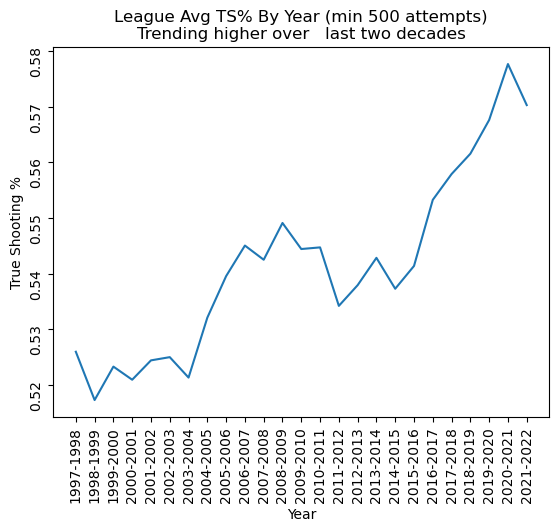

In [109]:
fig, ax = plt.subplots()
ax.plot(tsa_by_year)
ax.set_title('League Avg TS% By Year (min 500 attempts)\nTrending higher over   last two decades')
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)



In [110]:
true_shooting.sort_values(by='Year')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA
411,355,Brian Shaw,PG,31,TOT,59,34,25.9,2.6,7.6,...,1.7,2.5,6.3,1997-1998,0.393947,448.0,53.0,94.0,348.0,501.0
378,332,Glenn Robinson,SF,25,MIL,56,56,41.0,9.5,20.3,...,3.6,2.9,23.4,1997-1998,0.522042,1137.0,269.0,67.0,1070.0,1406.0
354,314,Mark Price,PG,33,ORL,63,33,22.7,3.6,8.4,...,2.6,1.5,9.5,1997-1998,0.521749,529.0,101.0,158.0,378.0,630.0
360,318,Khalid Reeves,PG,25,DAL,82,54,23.8,3.0,7.2,...,1.6,2.4,8.7,1997-1998,0.521333,590.0,213.0,156.0,443.0,803.0
150,128,Michael Finley,SF,24,DAL,82,82,41.4,8.2,18.4,...,2.7,2.0,21.5,1997-1998,0.520732,1509.0,418.0,246.0,1263.0,1927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,214,Tyrese Haliburton,SG-PG,21,TOT,77,77,35.0,5.6,11.8,...,2.6,1.6,15.3,2021-2022,0.593023,909.0,192.0,393.0,524.0,1101.0
14245,358,Tyrese Maxey,PG,21,PHI,75,74,35.3,6.4,13.3,...,1.2,2.1,17.5,2021-2022,0.593140,998.0,248.0,308.0,682.0,1246.0
14312,409,Georges Niang,PF,28,PHI,76,7,22.8,3.2,7.4,...,0.8,2.5,9.2,2021-2022,0.593395,562.0,61.0,388.0,175.0,623.0
14440,509,Marcus Smart,PG,27,BOS,71,71,32.3,4.2,10.1,...,2.2,2.3,12.1,2021-2022,0.540179,717.0,178.0,362.0,355.0,895.0


### Look at TS% by position (frontcourt/backcourt)
* 

In [186]:
import re 
p = re.compile('[FC]')

#tsa_frontcourt = true_shooting[true_shooting['Pos'].str.contains(['F','C'])]\
#                    .groupby(by='Year').mean()['TS%']

mask = true_shooting['Pos'].str.contains(r'[CF]', regex=True)
tsa_frontcourt =  true_shooting[mask]

mask = true_shooting['Pos'].str.contains(r'[G]', regex=True)
tsa_backcourt = true_shooting[mask]




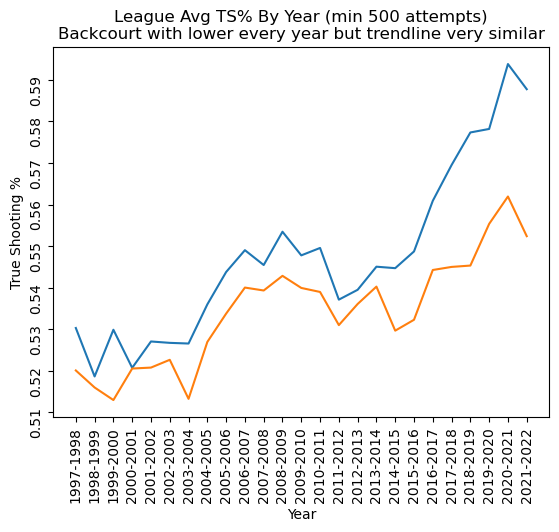

In [195]:
fig, ax = plt.subplots()
ax.plot(tsa_frontcourt.groupby(by='Year').mean()['TS%'])
ax.plot(tsa_backcourt.groupby(by='Year').mean()['TS%'])
ax.set_title(
    'League Avg TS% By Year (min 500 attempts)\nBackcourt with lower every year but trendline very similar'
    )
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)


In [202]:
three_point_shooting = stats[stats['t3PA'] > 55]

In [206]:
three_point_shooting['t3PA'].describe()

count    6159.000000
mean      200.076473
std       120.362013
min        56.000000
25%       104.000000
50%       170.000000
75%       268.000000
max      1030.000000
Name: t3PA, dtype: float64

<AxesSubplot:xlabel='Year'>

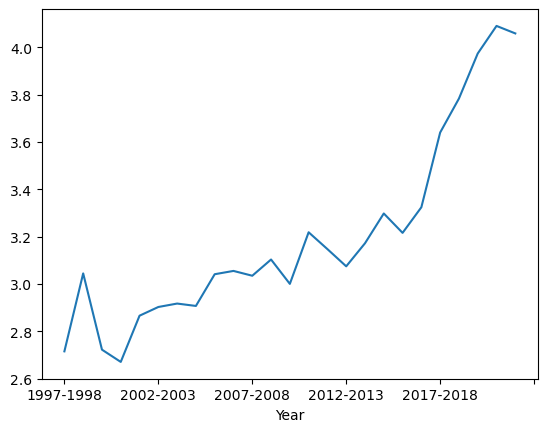

In [210]:
three_point_shooting.groupby(by='Year').mean()['3PA'].plot()

<AxesSubplot:xlabel='Year'>

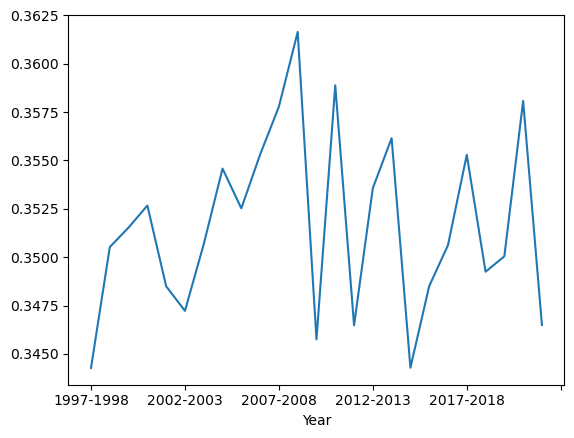

In [211]:
three_point_shooting.groupby(by='Year').mean()['3P%'].plot()